## Introdiction
<img src=https://upload.wikimedia.org/wikipedia/en/thumb/5/5b/Lending_Club_Corporate_Logo.svg/1920px-Lending_Club_Corporate_Logo.svg.png width="500">

**LendingClub** is a peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. At its height, LendingClub was the world's largest peer-to-peer lending platform. The company claims that \\$15,98 billion in loans had been originated through its platform up to December 31, 2015.
LendingClub enabled borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. The standard loan period was three years. Investors were able to search and browse the loan listings on LendingClub website and select loans that they wanted to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors made money from the interest on these loans. LendingClub made money by charging borrowers an origination fee and investors a service fee ( [Wikipedia](https://en.wikipedia.org/wiki/LendingClub)).

## Objectives
Customers who don't pay back their loan amount are a source of loss for the company. The aim of this task is to build a model assessing the chance of a loan default using binary classification methods.
The model will predict if a particular applicant will or will not be able to pay back the loan amount.

### Import Libraries
Import basic DS libraries to explore data.

In [1]:
# data manipulation and analysis libraries
import numpy as np 
import pandas as pd 

# graphics libraries
import seaborn as sns 
import matplotlib.pyplot as plt

## Load data
I will be working on data, where the loan was accepted if someone applied for it.

In [2]:
raw_df = pd.read_csv(
    "C:\\Users\\Kotula\\Desktop\\QU\\Raw_data\\accepted_2007_to_2018Q4.csv",
    low_memory=False
)

Let's take a look of the data shape.

In [3]:
raw_df.shape

(2260701, 151)

The data have 2260701 loans to look at and 151 potential variables. The analysis of 151 variables will take a long time. Due to the limited time of the task, use information from other projects involving the analysis of selected variables.

## Select specific variables
Based on [notebook](https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction/notebook) FARES SAYAH, I selescted 27 variebales to further analysis and read basic information about them (table in Data description).

In [4]:
df = raw_df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                  'emp_title', 'emp_length', 'home_ownership', 'annual_inc','verification_status',
                  'issue_d', 'loan_status', 'purpose', 'title',"addr_state",'dti','earliest_cr_line',
                  'open_acc', 'pub_rec', 'revol_bal','revol_util','total_acc', 'initial_list_status',
                  'application_type','mort_acc', 'pub_rec_bankruptcies']]
df.shape

(2260701, 27)

## Data description

----
-----
The information about 27 variables in data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

Let a quit look at a few first rows  and see a structure of data.

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0


Look at data types.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              float64
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  addr_state            object 
 16  dti                   float64
 17  earliest_cr_line      object 
 18  open_acc              float64
 19  pub_rec               float64
 20  revol_bal             float64
 21  revol_util            float64
 22  total_acc             float64
 23  initial

## Target variable 'loan status'
Describe  possible scenarios in 'loan ststus' and count them.

In [7]:
df['loan_status'].value_counts(dropna = False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

If the data where company approves the loan, we can see a few possible loan statuses:
* **Fully paid** - Applicant has fully paid the loan (the principal and the interest rate)
* **Current** - Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
* **Charged-off and others** - Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

Also we can see some NaN values in the target variable.

### Target Preprocessing
For further analysis I will drop observations where loan-status is 'current', because these candidates are not labelled as 'defaulted'. Also I will drop NaN obserwations without imputation. Then I will recoding the value of a variable loan status 'fully paid' on 0, and the rest of the observations as 1.

In [8]:
# drop NaN values
df = df[df['loan_status'].notna()]

# drop observations with loan_status = 'Current'
df = df[df['loan_status'].str.contains('Current')==False]

# check the results
df['loan_status'].value_counts(dropna = False)

Fully Paid                                             1076751
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [9]:
# Recoding  'fully paid' -> 0 , other -> 1
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [10]:
# check the result
df['loan_status'].value_counts(dropna = False)

0    1076751
1     305600
Name: loan_status, dtype: int64

Also, we can visualize target data.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

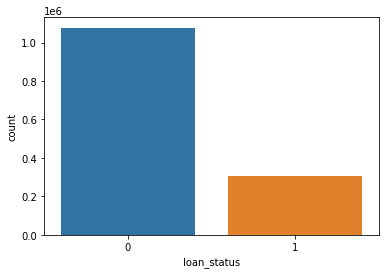

In [11]:
sns.countplot(x=df['loan_status'], data=df)
# 0 - fully paind
# 1 - charged off and others

Now, 'loan_status' has binary values. Based on the result and plot can see that this data is imbalanced. Metric used in prediction -accuracy will not work well in this situation.

In [12]:
# a number of observations after dropping NaN and 'current' status.
len(df)

1382351

##  Exploratory more data

Describe missing values in data.

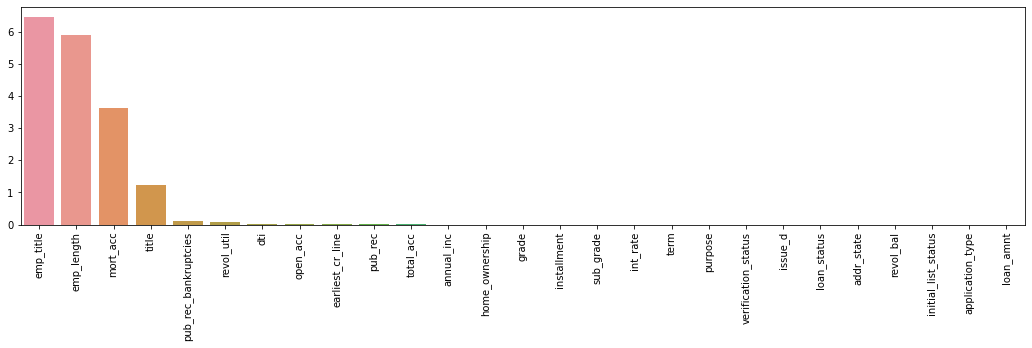

In [13]:
missing = df.isnull().sum().sort_values(ascending=False)* 100 / len(df)
# create visualization
plt.figure(figsize=(18,4))
sns.barplot(y=missing, x=missing.index)
plt.xticks(rotation=90);

Let's see percentage of missing values in dataset bigger than 0.

In [14]:
missing[missing>0]

emp_title               6.448796
emp_length              5.891196
mort_acc                3.619197
title                   1.238036
pub_rec_bankruptcies    0.098745
revol_util              0.067638
dti                     0.029804
open_acc                0.002098
earliest_cr_line        0.002098
pub_rec                 0.002098
total_acc               0.002098
annual_inc              0.000289
dtype: float64

In [15]:
# drop missing values
df = df.dropna()
len(df)

1230261

In [16]:
# look at number categorical and numeric variables
df.dtypes.value_counts()

object     14
float64    12
int64       1
dtype: int64

In [17]:
# describe categorical data
df.describe( include= ["object"]).transpose()

,count,unique,top,freq
term,1230261,2,36 months,921724
grade,1230261,7,B,356320
sub_grade,1230261,35,C1,78414
emp_title,1230261,355125,Teacher,21548
emp_length,1230261,11,10+ years,433422
home_ownership,1230261,6,MORTGAGE,612552
verification_status,1230261,3,Source Verified,497916
issue_d,1230261,82,Mar-2016,43049
purpose,1230261,14,debt_consolidation,721281
title,1230261,41394,Debt consolidation,638819


In **term** feature we can reduce "month" from obserbations. **purpose** and **title** have the same values in column "top" so may contain similar information (duplicates). Also I will look at the differences in **grade** and **sub_grade**. **emp_title** and **title** has lot of unique values.

#### 'Term' feature

In [18]:
# let see unique values
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

<AxesSubplot:xlabel='term', ylabel='count'>

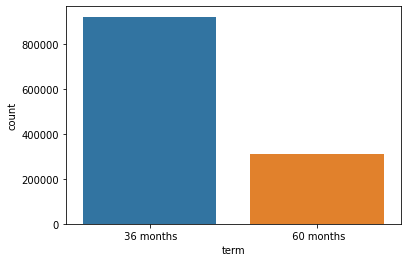

In [19]:
sns.countplot(x=df['term'], data=df)

In [20]:
# remove 'months' from obserbations
replace_term = {' 60 months': 60, ' 36 months': 36}
df['term'] = df['term'].replace(replace_term)
df = df.rename(columns={'term':'term_in_months'})

In [21]:
# check the result
df.term_in_months.unique()

array([36, 60], dtype=int64)

#### Look at "grade" and "sub_grade" features

In [22]:
# unique values 
print('Grade:', df['grade'].unique())
print('Sub_grade:', df['sub_grade'].unique())

Grade: ['C' 'F' 'B' 'A' 'E' 'D' 'G']
Sub_grade: ['C4' 'C1' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'E2' 'A4' 'E3' 'C2' 'C5' 'A1'
 'D4' 'B4' 'D1' 'B3' 'D3' 'D5' 'A5' 'F2' 'E4' 'D2' 'E1' 'F5' 'E5' 'A3'
 'G2' 'F3' 'G3' 'G4' 'F4' 'G5' 'G1']


In [23]:
# count observation in each group
print('Grade:\n', df['grade'].value_counts())
print('Sub_grade:\n',df['sub_grade'].value_counts())

Grade:
 B    356320
C    354488
A    209418
D    185490
E     86594
F     29475
G      8476
Name: grade, dtype: int64
Sub_grade:
 C1    78414
B4    75713
B5    74962
B3    73619
C2    72907
C4    69834
C3    69787
B2    67132
B1    64894
C5    63546
A5    57427
D1    47531
A4    45713
D2    41114
A1    39491
D3    36173
A3    33694
A2    33093
D4    32875
D5    27797
E1    21603
E2    19673
E3    17057
E4    14643
E5    13618
F1     9138
F2     6557
F3     5615
F4     4467
F5     3698
G1     2755
G2     1967
G3     1507
G4     1199
G5     1048
Name: sub_grade, dtype: int64


Let's see visualization grouping these features by loan_status.

<AxesSubplot:xlabel='grade', ylabel='count'>

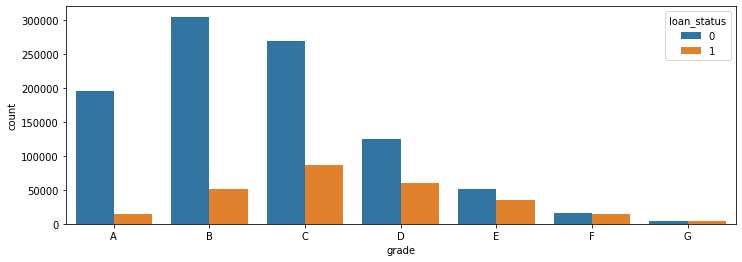

In [24]:
plt.figure(figsize=(12,4))
grade = sorted(df['grade'].unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

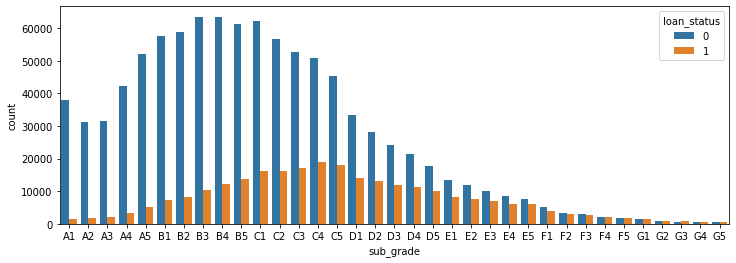

In [25]:
plt.figure(figsize=(12,4))
sub_grade = sorted(df['sub_grade'].unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

Grade is a part of sub_grade, it's duplicated information so let's just drop the grade feature.

In [26]:
df = df.drop(columns=['grade'])

#### Look at "title" and "purpose"

In [27]:
df[['title','purpose']].head(15)

,title,purpose
0,Debt consolidation,debt_consolidation
1,Business,small_business
4,Major purchase,major_purchase
5,Debt consolidation,debt_consolidation
6,Debt consolidation,debt_consolidation
7,Major purchase,major_purchase
8,Credit card refinancing,credit_card
9,Credit card refinancing,credit_card
13,Debt consolidation,debt_consolidation
14,Debt consolidation,debt_consolidation


'Title' and 'purpose' are very similar, 'title' has some NaN values and a lot of unique variables, so I drop this feature.

In [28]:
df = df.drop(columns=['title'])

#### "emp_length" feature

In [29]:
# unique value and counts
df['emp_length'].value_counts()

10+ years    433422
2 years      118108
< 1 year     104352
3 years      103938
1 year        85175
5 years       80830
4 years       77411
6 years       60492
8 years       59169
7 years       57745
9 years       49619
Name: emp_length, dtype: int64

In [30]:
df['emp_length'] = df['emp_length'].replace("< 1 year", "1 year")

<AxesSubplot:xlabel='emp_length', ylabel='count'>

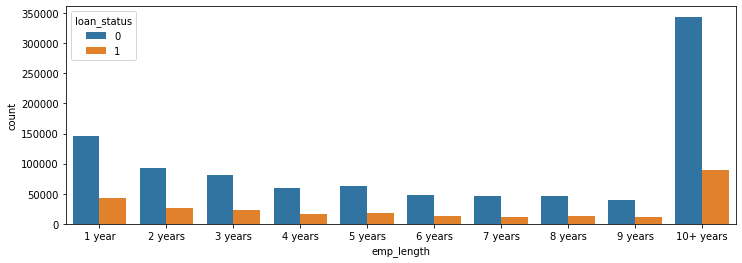

In [31]:
plt.figure(figsize=(12,4))
emp_length_order = [ '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
sns.countplot(x='emp_length',
              data=df,
              hue='loan_status',
              order=emp_length_order)

1 (charge off and others defaulted observations) are very similar in "emp_length" so I drop this feature.

In [32]:
df = df.drop(columns=['emp_length'])

#### "home_ownership" feature

In [33]:
# look at unique values and counts
df['home_ownership'].value_counts()

MORTGAGE    612552
RENT        490403
OWN         126963
ANY            259
NONE            43
OTHER           41
Name: home_ownership, dtype: int64

Add 'NONE' to 'ANY' group.

In [34]:
df['home_ownership'] = df['home_ownership'].replace(["ANY","NONE"], "OTHER")

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

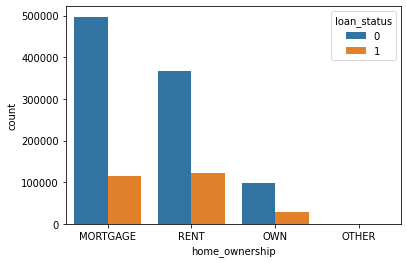

In [35]:
# visualize home_ownership group by 'loan_status'
sns.countplot(x='home_ownership', data=df, hue='loan_status')

#### visualize other categorical features

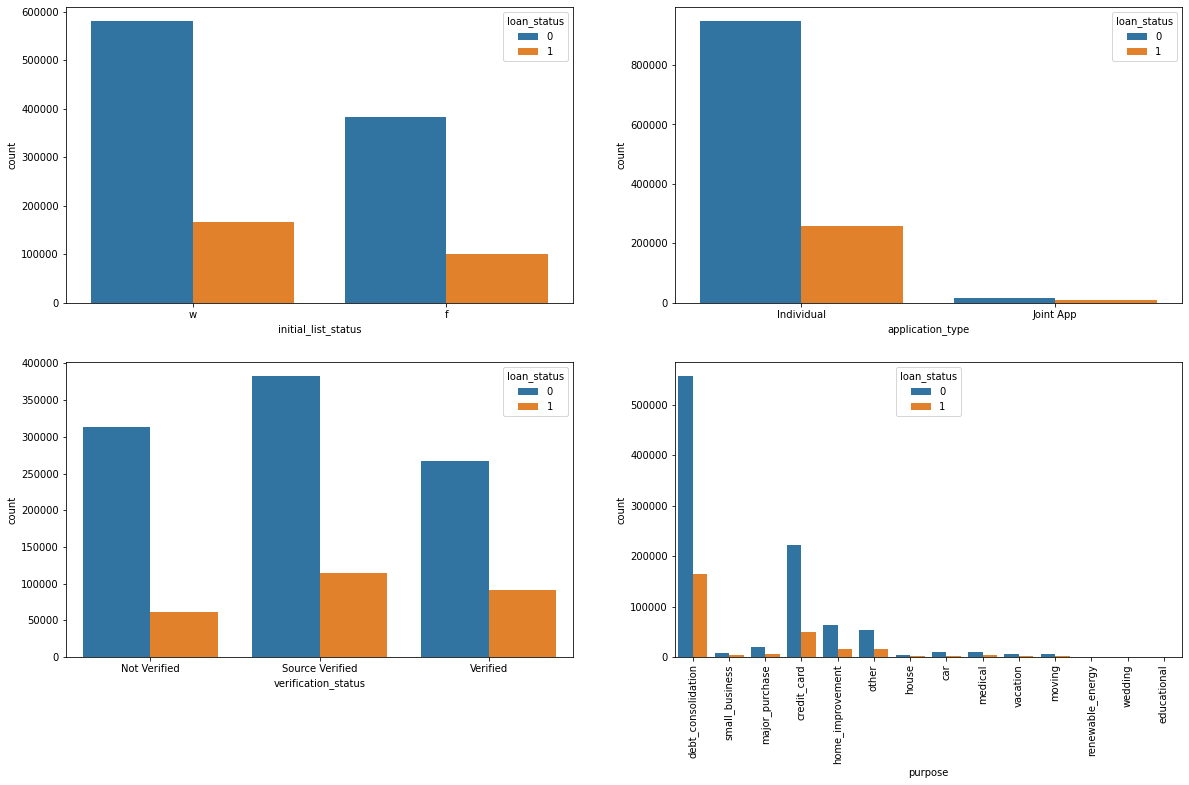

In [36]:
plt.figure(figsize=(20, 25))

plt.subplot(4, 2, 1)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='application_type', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Drop features that have to many unique values.

In [37]:
df = df.drop(columns=['emp_title','issue_d','earliest_cr_line', 'addr_state'])

Let take a look at basic summary of numeric variables.

In [38]:
# describe numeric data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1230261.0,14771.728763,8798.641478,1000.00,8000.00,12600.00,20000.00,40000.00
term_in_months,1230261.0,42.018957,10.403231,36.00,36.00,36.00,60.00,60.00
int_rate,1230261.0,13.327600,4.821112,5.31,9.75,12.79,16.02,30.99
installment,1230261.0,448.085806,263.835206,4.93,256.30,384.06,594.62,1719.83
annual_inc,1230261.0,78253.453814,71931.155855,32.00,48000.00,65500.00,93000.00,10999200.00
loan_status,1230261.0,0.216382,0.411778,0.00,0.00,0.00,0.00,1.00
dti,1230261.0,18.342280,9.626950,-1.00,11.93,17.72,24.18,999.00
open_acc,1230261.0,11.773029,5.523047,1.00,8.00,11.00,15.00,90.00
pub_rec,1230261.0,0.214545,0.606629,0.00,0.00,0.00,0.00,86.00
revol_bal,1230261.0,16517.551622,22599.936401,0.00,6101.00,11344.00,20056.00,2904836.00


Look closser at loan_amnt.

(array([ 25618.,  40002.,  45421., 107017.,  55394.,  77379., 137277.,
         39594.,  88709.,  29682., 105106.,  50166.,  24763.,  44389.,
         83052.,  26910.,  19488.,  39453.,  39608.,   8103.,  26842.,
          6128.,  32145.,   9670.,   4547.,   3823.,  51615.,    335.,
           465.,   7560.]),
 array([ 1000.,  2300.,  3600.,  4900.,  6200.,  7500.,  8800., 10100.,
        11400., 12700., 14000., 15300., 16600., 17900., 19200., 20500.,
        21800., 23100., 24400., 25700., 27000., 28300., 29600., 30900.,
        32200., 33500., 34800., 36100., 37400., 38700., 40000.]),
 <BarContainer object of 30 artists>)

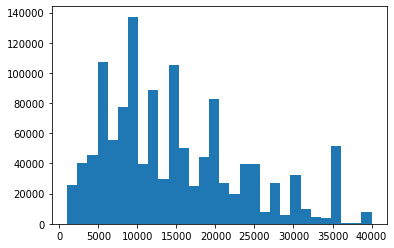

In [39]:
plt.hist(df['loan_amnt'],bins=30)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

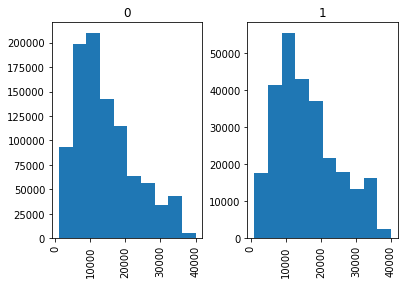

In [40]:
df['loan_amnt'].hist(by=df['loan_status'])

Take a look closer at the features: pub_rec, mort_acc, pub_rec_bankruptcies, because min,25%,median,75% are 0.

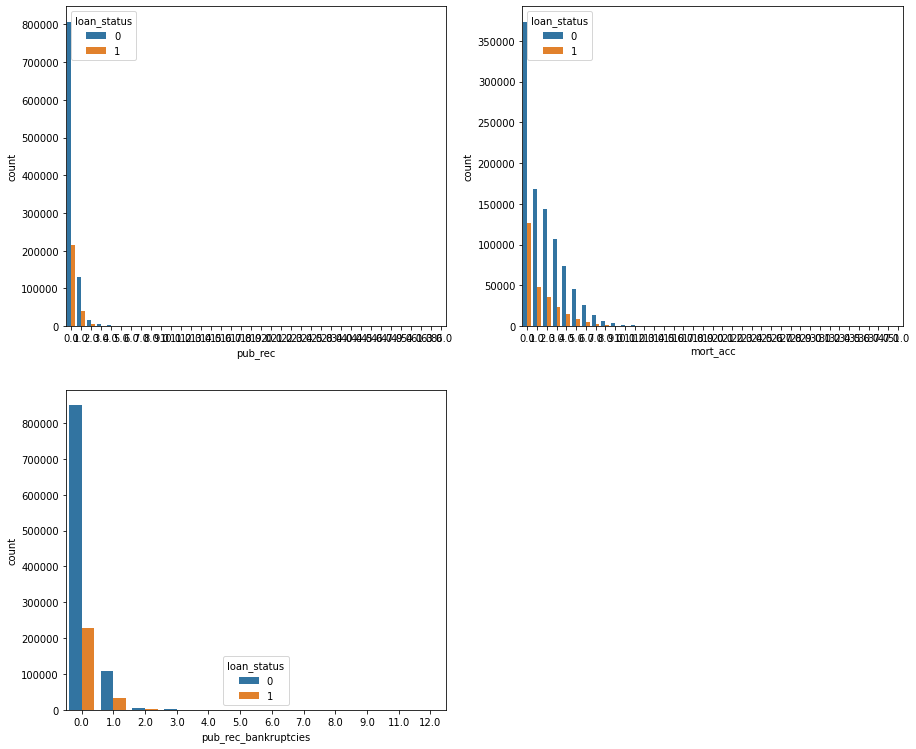

In [41]:
plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')

plt.subplot(3, 2, 2)
sns.countplot(x='mort_acc', data=df, hue='loan_status')

plt.subplot(3, 2, 3)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')

g.set_xticklabels(g.get_xticklabels(), rotation=90);

Let's transform these features to bolean.

In [42]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0 if x==0.0 else 1)
df['mort_acc'] = df['mort_acc'].apply(lambda x: 0 if x==0.0 else 1)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 0 if x==0.0 else 1)

#### Detect outliers in float values using 3sigma method

In [43]:
for x in list(df.describe( include= ["float"]).columns):
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    m = np.mean(df.loc[:,x])
    
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = m
    df.loc[df[x] > max,x] = m

In [44]:
df.describe( include= ["float"]).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [45]:
# check the result
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1230261.0,14613.517193,8567.897119,1000.00,8000.00,12600.00,20000.00,38000.00
term_in_months,1230261.0,42.018957,10.403231,36.00,36.00,36.00,60.00,60.00
int_rate,1230261.0,13.038486,4.353974,5.31,9.75,12.79,15.61,25.34
installment,1230261.0,426.298489,228.848173,4.93,256.30,384.06,561.29,1102.09
annual_inc,1230261.0,70395.332105,29999.356224,32.00,48000.00,65500.00,86000.00,160500.00
loan_status,1230261.0,0.216382,0.411778,0.00,0.00,0.00,0.00,1.00
dti,1230261.0,18.168489,8.333977,-1.00,11.93,17.72,24.07,42.55
open_acc,1230261.0,11.345547,4.676176,1.00,8.00,11.00,14.00,25.00
pub_rec,1230261.0,0.168208,0.374051,0.00,0.00,0.00,0.00,1.00
revol_bal,1230261.0,13082.983903,8943.430250,0.00,6101.00,11344.00,17310.00,40988.00


#### Create dummy variables for categorical feature

In [46]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

### Save processed data

In [47]:
df.to_csv('C:\\Users\\Kotula\\Desktop\\QU\\Processed_data\\processed_data.csv', index=False)